##NAME : ESHANT MAHALE
##TASK 1: PREDICTION USING SUPERVISED ML ALGORITHM

####TASK: Predicting the percentage of a student based on the number of hours of study and also predict the score if a student studies for 9.25 hours/day

#Data Loading

In [2]:
#importing initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#loading the dataset as a csv file
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
stu_data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
stu_data.shape

(25, 2)


 Thus we have data for 25 students with 2 columns , one showing the number of hours of study and second showing its corresponding score.




In [5]:
#checking for any null values in the dataset
stu_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

No null values is present, thus no imputation/removal required 

#Data Visualisation

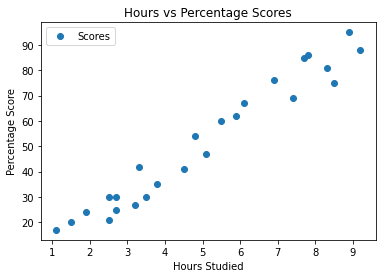

In [6]:
#plotting a scatter plot of original dataset 
stu_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph its evident that the hours and percentage has roughly a linear relationship , thus we can use Linear Regression technique for prediction, and the graph also implies there are no potential outliers present.

#Linear Regression Model

First we will divide the data into the row and column variable and split it into training and test sets using Scikit learn library.

In [7]:
x=stu_data[['Hours']] #predictor variables
y=stu_data['Scores']  #variable to be predicted
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (7, 1), (18,), (7,))

Thus we can see that the original data is split into training and test (25 percent split) , that is 18 in training and 7 in test of the 25 entries in the orginal data.
Next we will prepare a Linear Regression model and feed out training set to train our model.

In [8]:
from sklearn.linear_model import LinearRegression  
Regressor = LinearRegression()
Regressor.fit(x_train,y_train) #using the training dataset to train the model

# Now we will determine the coefficents of linear regression model , that is y= C0*x + C1 (C0 = coefficent and C1=intercept)
print(Regressor.coef_,Regressor.intercept_)

[9.94167834] 1.9322042531516601


Thus we have our regression fit line as **y=9.94*x + 1.932**
Now we will plot this fit line on our original dataset to see how good is the fit visually

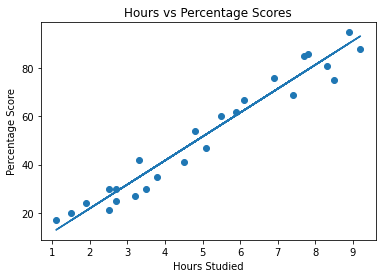

In [9]:
#plotting the regression fit line on the initial scatter plot
fit_line = Regressor.coef_*x+Regressor.intercept_

plt.scatter(x,y)
plt.plot(x,fit_line)
plt.title('Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

Thus the graph shows the fit line we got from the regression model correctly shows the relationship between the parameters.

Now we will verify our result by predicting values for the test dataset and seeing the  **MAE test value** 

#Predicting values

In [10]:
from sklearn import metrics 
#predicting the values on test set
y_pred = Regressor.predict(x_test) #using the test set for prediction
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #generating the Mean Absolute Error (MAE) for the model

#Comparing the predicted value and the actual value
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df_compare 


Mean Absolute Error: 4.130879918502482


,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


We got our predicted values, as we can see our predicted values are very closer to the actual values. We also got the Mean Absolute Error as **4.1308** , lower the value of MAE better the model.
Now we will also check our model using two other parameters i.e MSE and R-Squared values , similarly lower the value of RSQuared and MSE better the model.

In [13]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('RSquared value:', Regressor.score(x_test, y_test))

Mean Squared Error: 20.33292367497996
RSquared value: 0.9367661043365056


#Predicting the Score for 9.5 hours

In [14]:
#Predicting the percentage score for "9.25" hours using the model we build above
hours = [[9.25]]
new_pred = Regressor.predict(hours)
print("No of Hours of Study = {}".format(hours))
print("Predicted Percentage Score = {}".format(new_pred[0]))

No of Hours of Study = [[9.25]]
Predicted Percentage Score = 93.89272889341652


**Conclusion** : Therefore We got the percentage score of the student who studies for 9.25 hours to be **93.893%**